<a href="https://colab.research.google.com/github/mlvlab/vision-tutorial/blob/master/02_3_Hybrid_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
!wget https://raw.githubusercontent.com/j2kun/hybrid-images/master/einstein.png
!wget https://raw.githubusercontent.com/j2kun/hybrid-images/master/marilyn.png

--2019-09-30 14:46:34--  https://raw.githubusercontent.com/j2kun/hybrid-images/master/einstein.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111634 (109K) [image/png]
Saving to: ‘einstein.png’

einstein.png        100%[===================>] 109.02K  --.-KB/s    in 0.03s   

2019-09-30 14:46:34 (3.42 MB/s) - ‘einstein.png’ saved [111634/111634]

--2019-09-30 14:46:35--  https://raw.githubusercontent.com/j2kun/hybrid-images/master/marilyn.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135470 (132K) [image/png]
Saving to: ‘marilyn.p

In [0]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

In [0]:
def makeGaussianFilter(numRows, numCols, sigma, highPass=True):
    centerI = int(numRows/2) + 1 if numRows % 2 == 1 else int(numRows/2)
    centerJ = int(numCols/2) + 1 if numCols % 2 == 1 else int(numCols/2)

    def gaussian(i,j):
        coefficient = math.exp(-1.0 * ((i - centerI)**2 + (j - centerJ)**2) / (2 * sigma**2))
        return 1 - coefficient if highPass else coefficient

    return np.array([[gaussian(i,j) for j in range(numCols)] for i in range(numRows)])

In [0]:
def filterDFT(imageMatrix, filterMatrix):
    shiftedDFT = fftshift(fft2(imageMatrix))
    filteredDFT = shiftedDFT * filterMatrix

    return ifft2(ifftshift(filteredDFT))

In [0]:
def lowPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=False))

def highPass(imageMatrix, sigma):
    n, m = imageMatrix.shape
    return filterDFT(imageMatrix, makeGaussianFilter(n, m, sigma, highPass=True))

In [0]:
def hybridImage(highFreqImg, lowFreqImg, sigmaHigh, sigmaLow):
    highPassed = highPass(highFreqImg, sigmaHigh)
    lowPassed = lowPass(lowFreqImg, sigmaLow)

    return highPassed, lowPassed

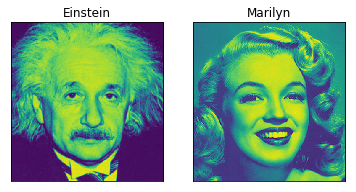

In [8]:
einstein = cv2.imread('einstein.png')
einstein = cv2.cvtColor(einstein, cv2.COLOR_BGR2GRAY)

marilyn = cv2.imread('marilyn.png')
marilyn = cv2.cvtColor(marilyn, cv2.COLOR_BGR2GRAY)

plt.subplot(121)
plt.imshow(einstein)
plt.title('Einstein'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(marilyn)
plt.title('Marilyn'), plt.xticks([]), plt.yticks([])

plt.show()

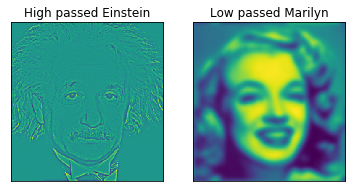

In [9]:
high, low = hybridImage(einstein, marilyn, 25, 10)

plt.subplot(121)
plt.imshow(np.real(high))
plt.title('High passed Einstein'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(np.real(low))
plt.title('Low passed Marilyn'), plt.xticks([]), plt.yticks([])

plt.show()

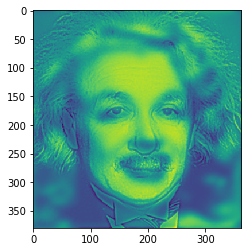

In [10]:
hybrid = high + low

plt.imshow(np.real(hybrid))
plt.show()